In [6]:
!pip install mplfinance


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import mplfinance as mpf

In [26]:
path = 'data/PTBA.csv'
start = "2019-01-01"
end = "2019-03-31"


dataset = pd.read_csv(path)
dataset.date = pd.DatetimeIndex(dataset.date)
dataset = dataset.set_index(dataset.date)
dataset = dataset.drop(['date'], axis=1)
dataset.head()

,open,high,low,close,volume,dividends,stock splits
date,,,,,,,
2002-12-23,38.85014,38.85014,37.231384,38.85014,74795000,0.0,0.0
2002-12-24,38.85014,38.85014,38.850140,38.85014,0,0.0,0.0
2002-12-25,38.85014,38.85014,38.850140,38.85014,0,0.0,0.0
2002-12-26,38.85014,38.85014,38.850140,38.85014,0,0.0,0.0
2002-12-27,38.85014,38.85014,37.231384,38.85014,36812500,0.0,0.0


In [27]:
def get_optimum_clusters(df, saturation_point=0.05):
    '''

    :param df: dataframe
    :param saturation_point: The amount of difference we are willing to detect
    :return: clusters with optimum K centers

    This method uses elbow method to find the optimum number of K clusters
    We initialize different K-means with 1..10 centers and compare the inertias
    If the difference is no more than saturation_point, we choose that as K and move on
    '''

    wcss = []
    k_models = []

    size = min(11, len(df.index))
    for i in range(1, size):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
        k_models.append(kmeans)

    # Compare differences in inertias until it's no more than saturation_point
    optimum_k = len(wcss)-1
    for i in range(0, len(wcss)-1):
        diff = abs(wcss[i+1] - wcss[i])
        if diff < saturation_point:
            optimum_k = i
            break

    print("Optimum K is " + str(optimum_k + 1))
    optimum_clusters = k_models[optimum_k]

    return optimum_clusters

In [29]:
data = dataset[-66:]
lows = pd.DataFrame(data=data, index=data.index, columns=["low"])
highs = pd.DataFrame(data=data, index=data.index, columns=["high"])

low_clusters = get_optimum_clusters(lows)
low_centers = low_clusters.cluster_centers_
low_centers = np.sort(low_centers, axis=0)

high_clusters = get_optimum_clusters(highs)
high_centers = high_clusters.cluster_centers_
high_centers = np.sort(high_centers, axis=0)

# print(data)
print(low_centers)
print(high_centers)

for low in low_centers[:2]:
    print(low[0])

for high in high_centers[-2:]:
    print(high[0])

Optimum K is 10
Optimum K is 10
[[3250.        ]
 [3315.71428571]
 [3362.5       ]
 [3411.11111111]
 [3475.        ]
 [3530.        ]
 [3664.54545455]
 [3743.33333333]
 [3843.75      ]
 [3920.        ]]
[[3371.42857143]
 [3431.25      ]
 [3486.66666667]
 [3538.        ]
 [3593.33333333]
 [3698.        ]
 [3744.        ]
 [3807.5       ]
 [3905.55555556]
 [3997.5       ]]
3250.0
3315.714285714286
3905.5555555555557
3997.5


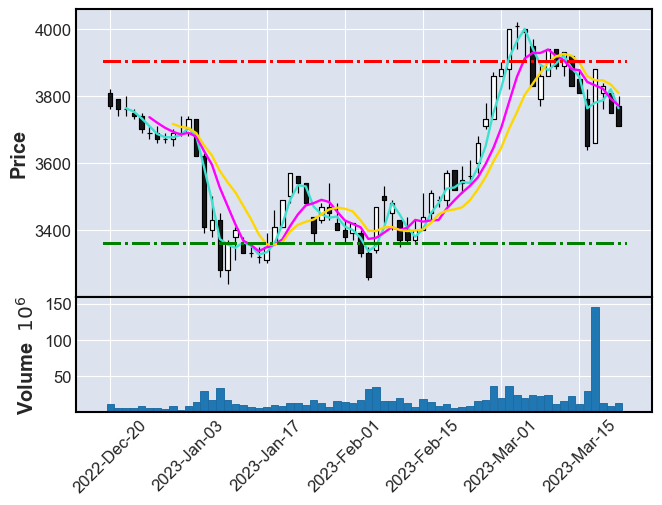

In [31]:
mpf.plot(dataset[-66:],type='candle',mav=(3,6,9),volume=True, hlines=dict(hlines=[low_centers[2][0],high_centers[-2][0]],colors=['g','r'],linestyle='-.'))